# Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

# Read the Dataset

In [ ]:
!wget https://github.com/KlinterAI/equipany-tabular-data/raw/main/dataset/Reported%20Issues.xlsx

--2023-04-04 16:47:26--  https://github.com/KlinterAI/equipany-tabular-data/raw/main/dataset/Reported%20Issues.xlsx
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/KlinterAI/equipany-tabular-data/main/dataset/Reported%20Issues.xlsx [following]
--2023-04-04 16:47:27--  https://raw.githubusercontent.com/KlinterAI/equipany-tabular-data/main/dataset/Reported%20Issues.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 127694 (125K) [application/octet-stream]
Saving to: ‘Reported Issues.xlsx’

Reported Issues.xls 100%[===================>] 124.70K  --.-KB/s    in 0.02s   

2023-04-04 16:47:27 (5.85 

In [ ]:
dataset = pd.read_excel("Reported Issues 2.xlsx", sheet_name='Reported Issues')
dataset.head()

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Case,Name,Method,Category,Time of Snapshot,Event ID,Score,Time (hrs),Obj1,Val1,...,Obj11,Val11,Obj12,Val12,Obj13,Val13,Obj14,Val14,Obj15,Val15
0,NaN,Delays,A Potential Risk,Potential Issue,2023-01-12 10:34:00,8,1,15,person with PPE,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Other Issues,A Potential Risk,Potential Issue,2023-02-19 17:46:00,3,2,20,person with PPE,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Issues,A Potential Risk,Potential Issue,2023-02-04 15:21:00,5,3,12,pile casing,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Repairs,A Potential Risk,Potential Issue,2023-01-18 16:31:00,2,5,17,load carrying crane,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Risk,A Potential Risk,Potential Risk,2023-01-30 11:38:00,1,8,19,excavator,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cost_codes = pd.read_excel("Reported Issues 2.xlsx", sheet_name='iot_cost_code')
cost_codes.head()

,ID,activity_code,time_detection_start,date,rand
0,1,16-500 - Lighting,2023-01-10 09:20:00,10,98
1,9,2-300 - Earthwork,2023-01-11 09:20:00,15,83
2,17,2-240 - Dewatering,2023-01-12 09:20:00,14,151
3,25,11-190 - Detention Equipment,2023-01-13 09:20:00,17,57
4,33,17-020 - Insurance,2023-01-15 09:20:00,13,66


## Dataset: IoT Metadata

In [ ]:
metadata = pd.read_excel("Reported Issues 2.xlsx", sheet_name='iot_metadata')
metadata.head()

,ID,MATERIAL_PO,EQUIPMENT_ID,EPC_NUMBER,MANUFACTURER
0,1,to413515,tab-0027,EPC-597350908,SAP
1,2,an194700,cap-0485,EPC-672337149,Intel
2,3,up741254,sex-2803,EPC-548634322,SAP
3,4,of167017,mew-2343,EPC-997770522,ARM
4,5,ah893050,fit-5458,EPC-837833410,ARM


## Dataset: IoT SNMP Tokens

In [ ]:
tokens = pd.read_excel("Reported Issues 2.xlsx", sheet_name='iot_token')
tokens.head()

,ID,SNMP_TOKEN,TIMESTAMP
0,1,87618041369c57a36d99a77bda1f738863b7ebc4,2023-01-10 09:10:00.000
1,1,3b934f12f024d912ca14fb846f2a4dd55c5fb827,2023-01-10 09:35:00.000
2,1,ce40eeade39f49d9cd85c2ad41e0c8effee5addb,2023-01-10 10:00:00.000
3,1,c71409dc0221bac4a2fd95e09ed67e01ac4fd740,2023-01-10 10:24:59.985
4,1,6d0a75792af5cb2ce831a0531ebfeaebf4e885eb,2023-01-10 10:49:59.980


# Cleaning the Dataset

# Initial Data Analysis (IDA)

# Risk Assessment

In [ ]:
dataset['Score']

0    1
1    2
2    3
3    4
4    5
5    5
6    7
7    8
8    9
Name: Score, dtype: int64

In [ ]:
dataset.head()

,Case,Name,Method,Category,Time of Snapshot,Event ID,Score,Time (hrs),Obj1,Val1,...,Obj11,Val11,Obj12,Val12,Obj13,Val13,Obj14,Val14,Obj15,Val15
0,NaN,Delays,A Potential Risk,Potential Issue,2023-01-12 10:34:00,8,1,15,person with PPE,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Other Issues,A Potential Risk,Potential Issue,2023-02-19 17:46:00,3,2,20,person with PPE,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Issues,A Potential Risk,Potential Issue,2023-02-04 15:21:00,5,3,12,pile casing,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Repairs,A Potential Risk,Potential Issue,2023-01-18 16:31:00,2,5,17,load carrying crane,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Risk,A Potential Risk,Potential Risk,2023-01-30 11:38:00,1,8,19,excavator,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Descriptive Statistics

In [ ]:
dataset.describe()

,Score,Time (hrs),Val1,Val2,Val3,Val4,Val5,Val6,Val7,Val8,...,Obj11,Val11,Obj12,Val12,Obj13,Val13,Obj14,Val14,Obj15,Val15
count,9.000000,9.000000,9.0,9.000000,9.000000,8.000000,4.000000,2.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4.888889,16.000000,4.0,4.222222,3.666667,2.625000,2.500000,2.000000,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.713137,3.605551,2.0,2.728451,1.224745,1.685018,1.732051,1.414214,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,11.000000,1.0,1.000000,2.000000,1.000000,1.000000,1.000000,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.000000,12.000000,3.0,2.000000,3.000000,1.750000,1.750000,1.500000,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.000000,17.000000,4.0,4.000000,3.000000,2.000000,2.000000,2.000000,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.000000,19.000000,6.0,6.000000,4.000000,3.250000,2.750000,2.500000,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,9.000000,20.000000,7.0,8.000000,6.000000,6.000000,5.000000,3.000000,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

# Research Question 1: What is the operational time of activities recorded against 1 Issue Reported

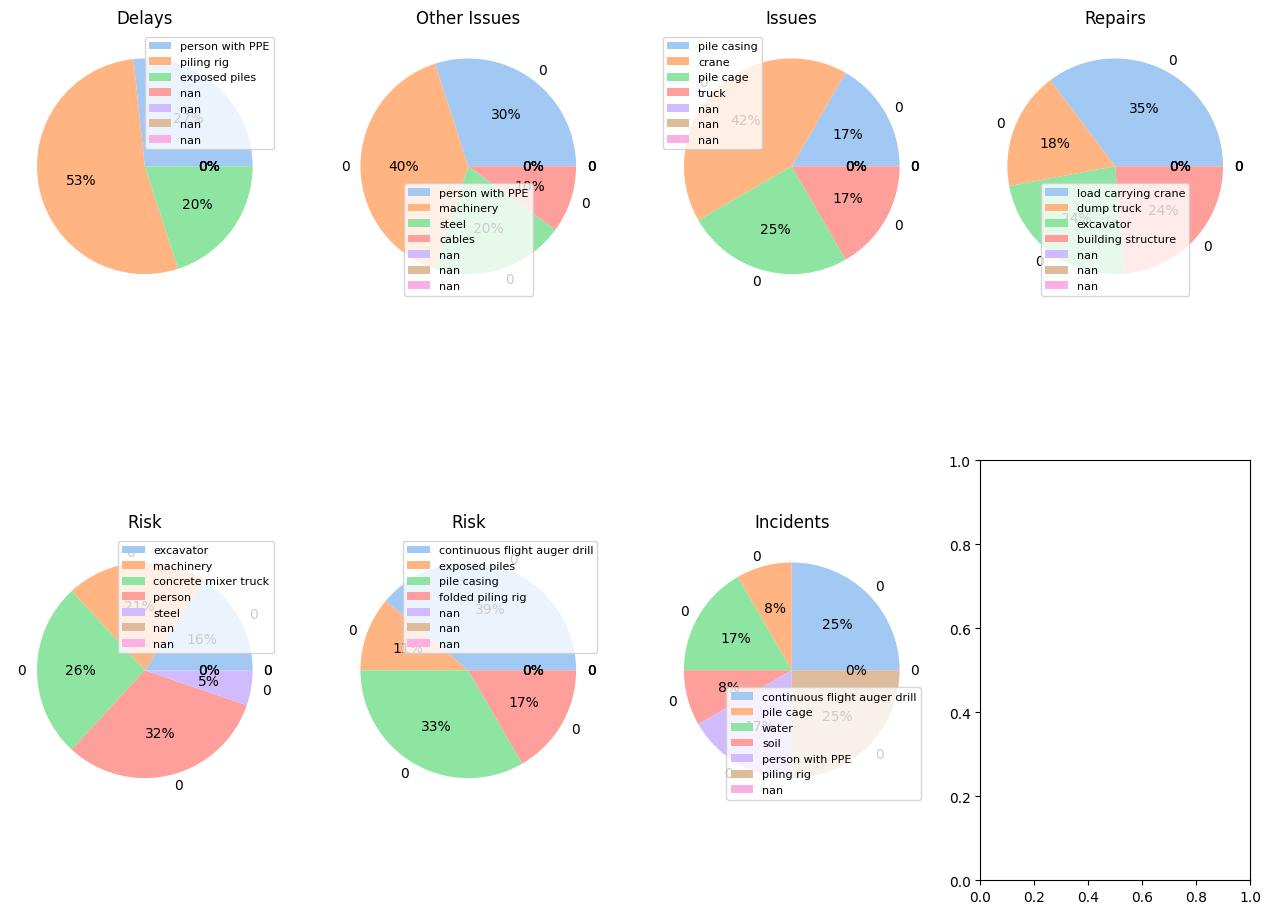

In [ ]:
from matplotlib.font_manager import dataclasses
import seaborn as sns

#define data
labels = ['Obj1', 'Obj2', 'Obj3', 'Obj4', 'Obj5', 'Obj6', 'Obj7']
data = ['Val1', 'Val2', 'Val3', 'Val4', 'Val5', 'Val6', 'Val7']

fig, ax = plt.subplots(2, 4, figsize=(16,12))

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:7]

#create pie chart
ax[0][0].pie([0 if np.isnan(dataset.loc[0, d]) else dataset.loc[0, d] for ii, d in enumerate(data)], colors = colors, autopct='%.0f%%')
ax[0][0].set_title(dataset.loc[0, 'Name'])
ax[0][0].legend([dataset.loc[0, label] if dataset.loc[0, label] != np.nan else 'Unknown' for ii, label in enumerate(labels)], fontsize=8)
ax[0][1].pie([0 if np.isnan(dataset.loc[1, d]) else dataset.loc[1, d] for ii, d in enumerate(data)], labels = [0 if dataset.loc[1, label] != np.nan else 0 for ii, label in enumerate(labels)], colors = colors, autopct='%.0f%%')
ax[0][1].set_title(dataset.loc[1, 'Name'])
ax[0][1].legend([dataset.loc[1, label] if dataset.loc[1, label] != np.nan else 'Unknown' for ii, label in enumerate(labels)], fontsize=8)
ax[0][2].pie([0 if np.isnan(dataset.loc[2, d]) else dataset.loc[2, d] for ii, d in enumerate(data)], labels = [0 if dataset.loc[2, label] != np.nan else 0 for ii, label in enumerate(labels)], colors = colors, autopct='%.0f%%')
ax[0][2].set_title(dataset.loc[2, 'Name'])
ax[0][2].legend([dataset.loc[2, label] if dataset.loc[2, label] != np.nan else 'Unknown' for ii, label in enumerate(labels)], fontsize=8)
ax[0][3].pie([0 if np.isnan(dataset.loc[3, d]) else dataset.loc[3, d] for ii, d in enumerate(data)], labels = [0 if dataset.loc[3, label] != np.nan else 0 for ii, label in enumerate(labels)], colors = colors, autopct='%.0f%%')
ax[0][3].set_title(dataset.loc[3, 'Name'])
ax[0][3].legend([dataset.loc[3, label] if dataset.loc[3, label] != np.nan else 'Unknown' for ii, label in enumerate(labels)], fontsize=8)
ax[1][0].pie([0 if np.isnan(dataset.loc[4, d]) else dataset.loc[4, d] for ii, d in enumerate(data)], labels = [0 if dataset.loc[4, label] != np.nan else 0 for ii, label in enumerate(labels)], colors = colors, autopct='%.0f%%')
ax[1][0].set_title(dataset.loc[4, 'Name'])
ax[1][0].legend([dataset.loc[4, label] if dataset.loc[4, label] != np.nan else 'Unknown' for ii, label in enumerate(labels)], fontsize=8)
ax[1][1].pie([0 if np.isnan(dataset.loc[5, d]) else dataset.loc[5, d] for ii, d in enumerate(data)], labels = [0 if dataset.loc[5, label] != np.nan else 0 for ii, label in enumerate(labels)], colors = colors, autopct='%.0f%%')
ax[1][1].set_title(dataset.loc[5, 'Name'])
ax[1][1].legend([dataset.loc[5, label] if dataset.loc[5, label] != np.nan else 'Unknown' for ii, label in enumerate(labels)], fontsize=8)
ax[1][2].pie([0 if np.isnan(dataset.loc[6, d]) else dataset.loc[6, d] for ii, d in enumerate(data)], labels = [0 if dataset.loc[6, label] != np.nan else 0 for ii, label in enumerate(labels)], colors = colors, autopct='%.0f%%')
ax[1][2].set_title(dataset.loc[6, 'Name'])
ax[1][2].legend([dataset.loc[6, label] if dataset.loc[6, label] != np.nan else 'Unknown' for ii, label in enumerate(labels)], fontsize=8)
fig.show()